In [99]:
import matplotlib.pyplot as plt

from pymatgen.ext.matproj import MPRester
import scipy.constants as sc
import matplotlib.image as mpimg

import numpy as np
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter


In [100]:
# Téléchargement de la structure de bande électronique

with MPRester ("VTUv2zAwLlpXxhqy") as m:
    bstructure = m.get_bandstructure_by_material_id("mp-570485")



<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

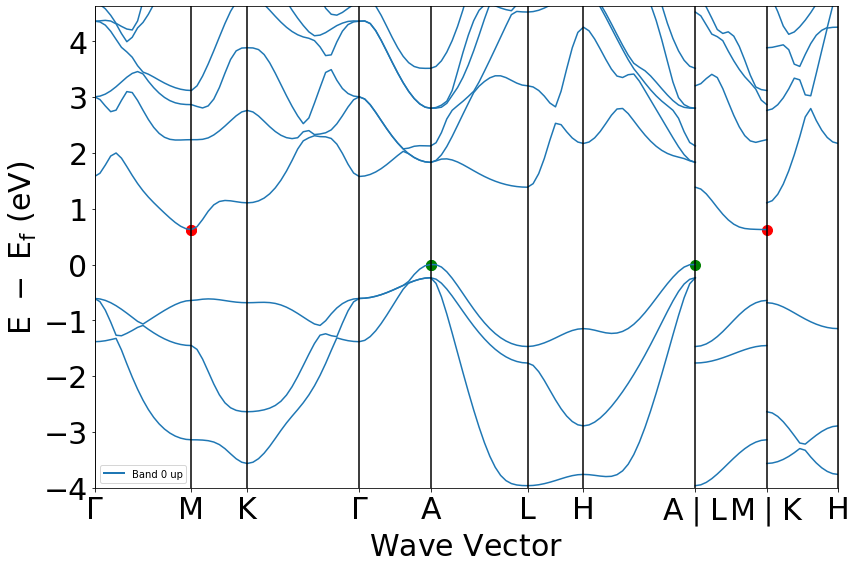

In [101]:
BSplot = BSPlotter(bstructure) 
BSplot.get_plot(vbm_cbm_marker=True)

In [102]:
#1)Déterminer la bande interdite

print("Informations sur la bande interdite =",bstructure.get_band_gap())

print("En résumé:")

print("L'énergie de la bande :", bstructure.get_band_gap()['energy'],"[eV].")
if bstructure.get_band_gap()['direct'] == False:
    print("La bande interdite est indirecte.")
else:
    print("La bande interdite est directe.")

print("La bande interdite se situe entre", 0, 'eV et', bstructure.get_band_gap()['energy'], "[eV].")
print("Le vecteur de transition :", bstructure.get_band_gap()['transition'])

Informations sur la bande interdite = {'direct': False, 'energy': 0.6256999999999993, 'transition': 'A-M'}
En résumé:
L'énergie de la bande : 0.6256999999999993 [eV].
La bande interdite est indirecte.
La bande interdite se situe entre 0 eV et 0.6256999999999993 [eV].
Le vecteur de transition : A-M


In [103]:
#2)On recherche la bande de conduction avec le plus de dispertion


print("Bande de conduction avec le plus de dispersion :")
print("Liste des indices de la bande de valence maximum :", bstructure.get_vbm().get('band_index'))
print("L'étiquette du kpoint est :", bstructure.get_vbm()['kpoint'].label)
print('Vecteur k (coordonnées cartésiennes) =',bstructure.get_vbm()['kpoint'].cart_coords)
print("L'énergie de la bande de valence maximum :", bstructure.get_vbm()['energy'], "eV")
print("\n")

#On recherche la bande de valence avec le moins de dispertion


print("Bande de conduction avec le moins de dispersion :")
print("Liste des indices de la bande de valence minimum :", bstructure.get_cbm().get('band_index'))
print("L'étiquette du kpoint est :", bstructure.get_cbm()['kpoint'].label)
print('Vecteur k (coordonnées cartésiennes) =',bstructure.get_cbm()['kpoint'].cart_coords)
print("L'énergie de la bande de valence minimum :",bstructure.get_cbm()['energy'] , "eV")


Bande de conduction avec le plus de dispersion :
Liste des indices de la bande de valence maximum : defaultdict(<class 'list'>, {<Spin.up: 1>: [8]})
L'étiquette du kpoint est : A
Vecteur k (coordonnées cartésiennes) = [0.         0.         0.63277529]
L'énergie de la bande de valence maximum : 4.1523 eV


Bande de conduction avec le moins de dispersion :
Liste des indices de la bande de valence minimum : defaultdict(<class 'list'>, {<Spin.up: 1>: [9]})
L'étiquette du kpoint est : M
Vecteur k (coordonnées cartésiennes) = [ 0.74280042 -0.42885592  0.        ]
L'énergie de la bande de valence minimum : 4.778 eV


In [106]:
#3) Calculer la masse effective au sommet de la dernière bande de valence en supposant une dispersion parabolique 


#masse effective pour la derniere bande de valence 

Evbm = bstructure.get_vbm()['energy']
meffvbm =  (h_bar**2 * (bstructure.get_vbm()['kpoint'].cart_coords[0]**2+bstructure.get_vbm()['kpoint'].cart_coords[1]**2+bstructure.get_vbm()['kpoint'].cart_coords[2]**2))/(2*abs(Evbm))
print("La masse effective de la bande maximale de conduction est : ", meffvbm  ,"kg" , " = ",  meffvbm/s.m_e, 'm_e')

#masse effective pour la premiere bande de conduction
print("\n")

Ecbm = bstructure.get_cbm()['energy']
meffcbm = (h_bar**2 * (bstructure.get_cbm()['kpoint'].cart_coords[0]**2+bstructure.get_cbm()['kpoint'].cart_coords[1]**2+bstructure.get_cbm()['kpoint'].cart_coords[2]**2))/(2*Ecbm)
print("La masse effective de la bande minimale de conduction est : ", meffcbm ,"kg" ," = "  ,  meffcbm/s.m_e, 'm_e' )

4.332404041e-31
La masse effective de la bande maximale de conduction est :  2.088859652429798e-32 kg  =  0.022930855927013317 m_e


La masse effective de la bande minimale de conduction est :  3.3353067046860175e-32 kg  =  0.03661396658631042 m_e
